# THE PREDICTIVE MODELING PIPELINE

## Initial Tests

In [18]:
import pandas as pd

adult_census = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn MOOC/Data/adult_census.csv")

In [2]:
adult_census.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
target_column = "class"
adult_census[target_column].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

In [4]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [5]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


In [7]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


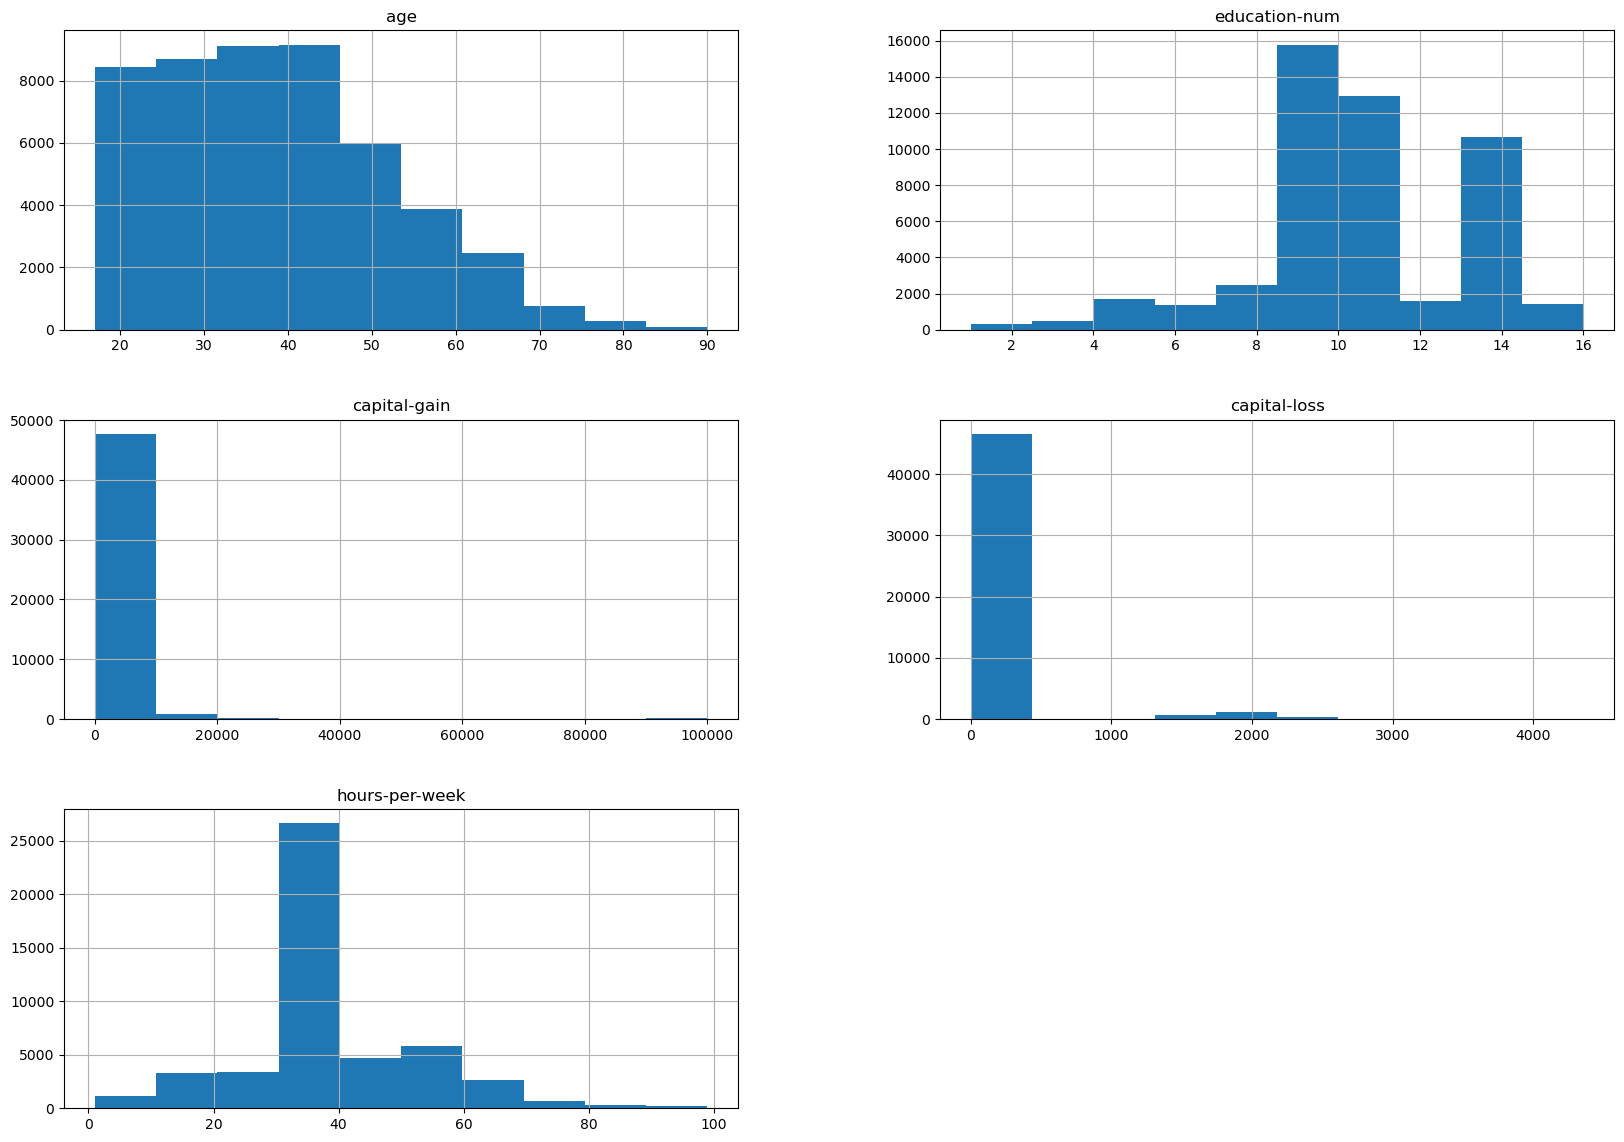

In [10]:
_ = adult_census.hist(figsize=(20, 14))

In [12]:
adult_census["sex"].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [13]:
adult_census["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [14]:
pd.crosstab(index=adult_census["education"], columns=adult_census["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


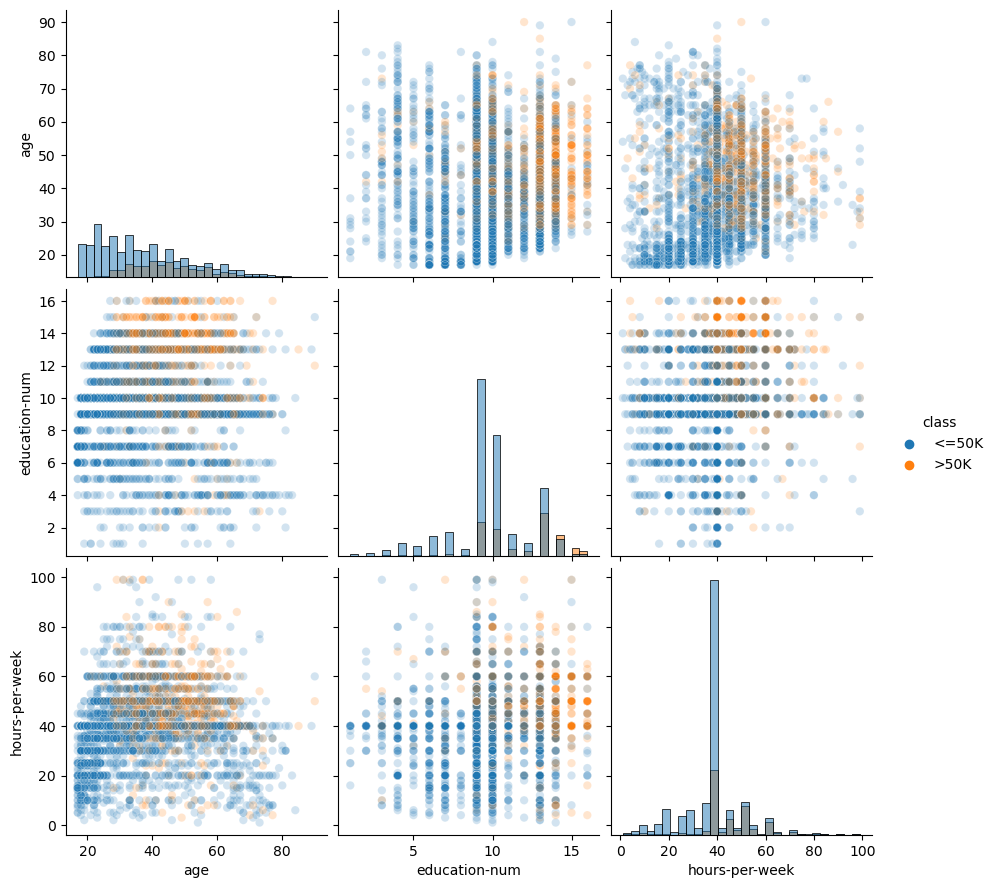

In [15]:
import seaborn as sns

# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

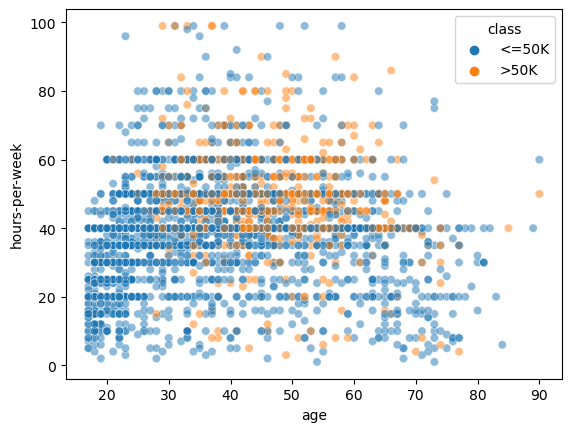

In [16]:
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

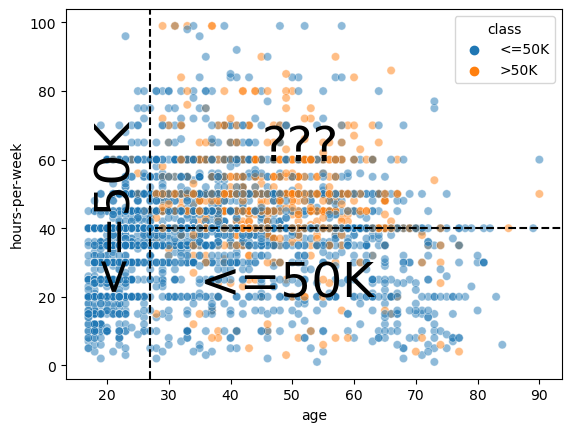

In [17]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

## PENGUINS EXAMPLE

In [2]:
! git clone 'https://github.com/INRIA/scikit-learn-mooc' '/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone'

Cloning into '/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone'...
remote: Enumerating objects: 56069, done.
remote: Counting objects: 100% (657/657), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 56069 (delta 464), reused 559 (delta 391), pack-reused 55412
Receiving objects: 100% (56069/56069), 364.07 MiB | 6.90 MiB/s, done.
Resolving deltas: 100% (43342/43342), done.


In [6]:
import seaborn as sns
import pandas as pd
penguins = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/penguins_classification.csv")

In [7]:
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


In [9]:
target_column = "Species"
penguins[target_column].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

In [10]:
numerical_columns = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
]

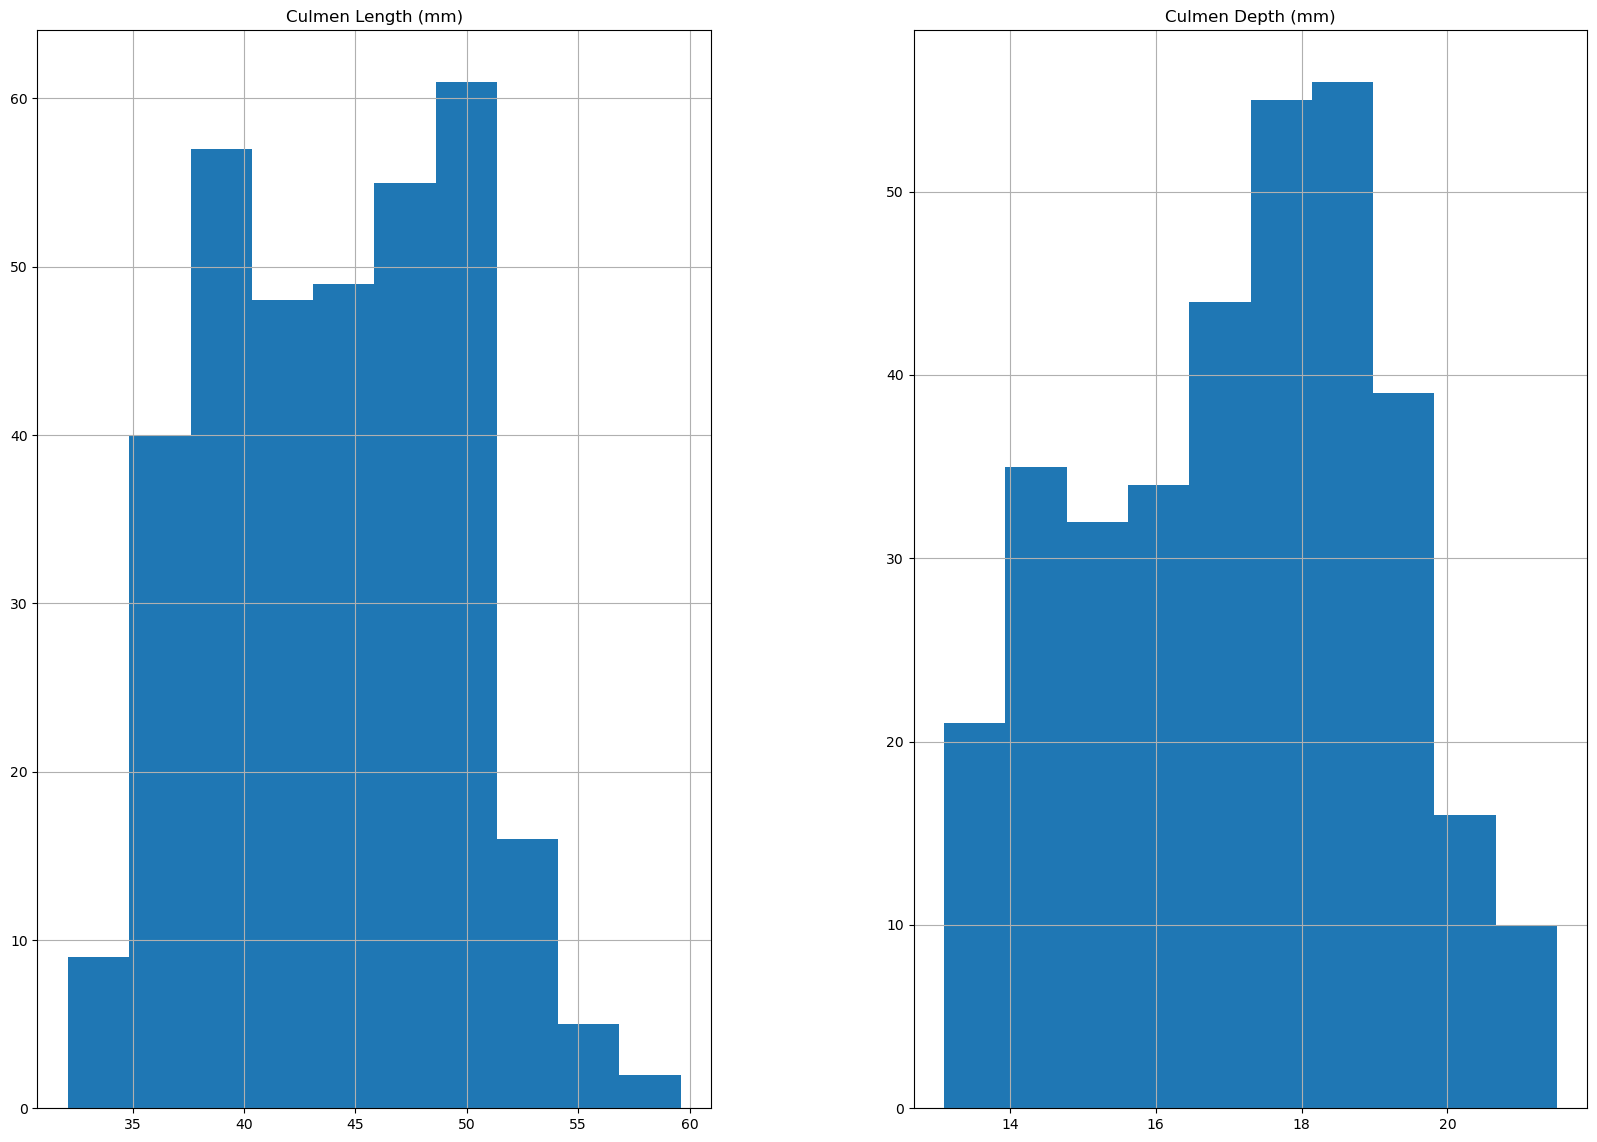

In [11]:
_ = penguins.hist(figsize=(20, 14))

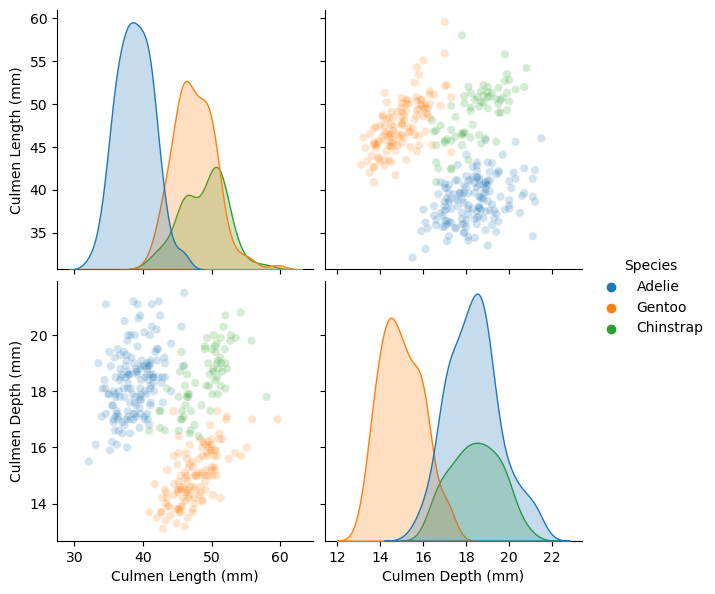

In [15]:
columns = numerical_columns
_ = sns.pairplot(data=penguins,
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="kde",
)

## First Model With Scikit-Learn

In [17]:
adult_census = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census-numeric.csv")
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [18]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [20]:
data = adult_census.drop(columns=[target_name, ])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [21]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [22]:
print(f"The dataset contains {data.shape[0]} samples and "
      f"{data.shape[1]} features")

The dataset contains 39073 samples and 4 features


In [23]:
# Fit the k-NN model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
_ = model.fit(data, target)

In [24]:
target_predicted = model.predict(data)

In [25]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [26]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [27]:
target_predicted[:5]==target[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [28]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 4 / 5


In [29]:
(target == target_predicted).mean()

0.8219486602001382

In [31]:
adult_census_test = pd.read_csv('/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census-numeric-test.csv')

In [32]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name, ])

In [33]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")

The testing dataset contains 9769 samples and 4 features


In [34]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.802


### Exercise M1.02

In [36]:
adult_census = pd.read_csv('/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census-numeric.csv')
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [39]:
target_column = "class"
data = adult_census.drop(columns=[target_column, ])
test = adult_census[target_column]

In [46]:
KNN = KNeighborsClassifier(n_neighbors=50)

In [47]:
KNN.fit(data, target);

In [48]:
KNN.predict(data[:10])

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [49]:
KNN.score(data, target)

0.8290635477183733

In [50]:
adult_test = pd.read_csv('/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census-numeric-test.csv')
target_test = adult_test["class"]
data_test = adult_test.drop(columns=["class", ])
KNN.score(data_test, target_test)

0.8194288054048521

## Working with numerical data

In [51]:
import pandas as pd

adult_census = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census.csv")
# drop the duplicated column `"education-num"` as stated in the first notebook
adult_census = adult_census.drop(columns="education-num")
adult_census.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [52]:
data, target = adult_census.drop(columns="class"), adult_census["class"]
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [54]:
target.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: class, dtype: object

In [55]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [56]:
data.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [57]:
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]
data[numerical_columns].head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [58]:
data["age"].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [59]:
data_numeric = data[numerical_columns]

In [60]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

In [61]:
print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in testing: 12211 => 25.0% of the original set


In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [63]:
model.fit(data_train, target_train)
accuracy = model.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.807


### Exercise M1.03

In [64]:
import pandas as pd

adult_census = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census.csv")

In [65]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [66]:
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

In [68]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numeric, target, random_state=42, test_size=0.25)

In [73]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='constant', constant=' >50K')
model.fit(data_train, target_train)
accuracy = model.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.234


In [74]:
model = DummyClassifier(strategy='constant', constant=' <=50K')
model.fit(data_train, target_train)
accuracy = model.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.766


In [75]:
adult_census["class"].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [76]:
(target == " <=50K").mean()

0.7607182343065395

In [78]:
most_freq_revenue_clf = DummyClassifier(strategy="most_frequent")
most_freq_revenue_clf.fit(data_train, target_train)
score = most_freq_revenue_clf.score(data_test, target_test)
print(f"Accuracy of a model predicting the most frequent class: {score:.3f}")

Accuracy of a model predicting the most frequent class: 0.766


## Preprocessing Data

In [79]:
import pandas as pd

adult_census = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census.csv")

In [ ]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

In [80]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [82]:
data_numeric.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [83]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42)

In [84]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [86]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [88]:
# scaler standard deviation
scaler.scale_

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])

In [89]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [90]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [91]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.273364e-16,3.530310e-17,3.840667e-17,1.844684e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


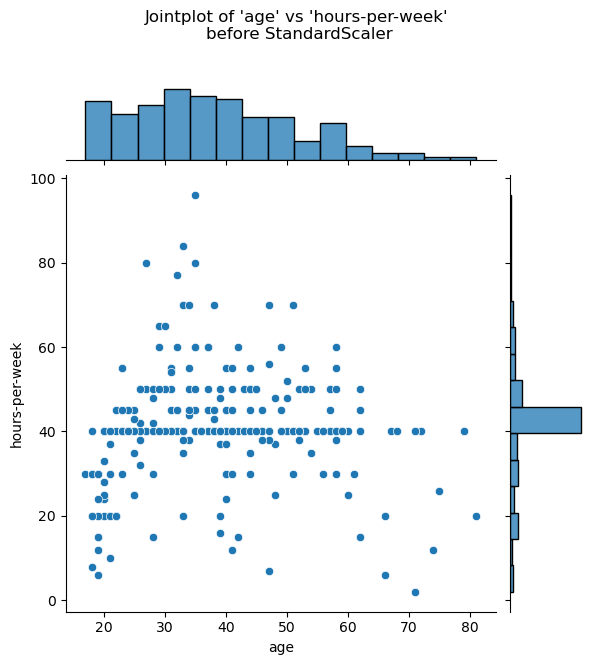

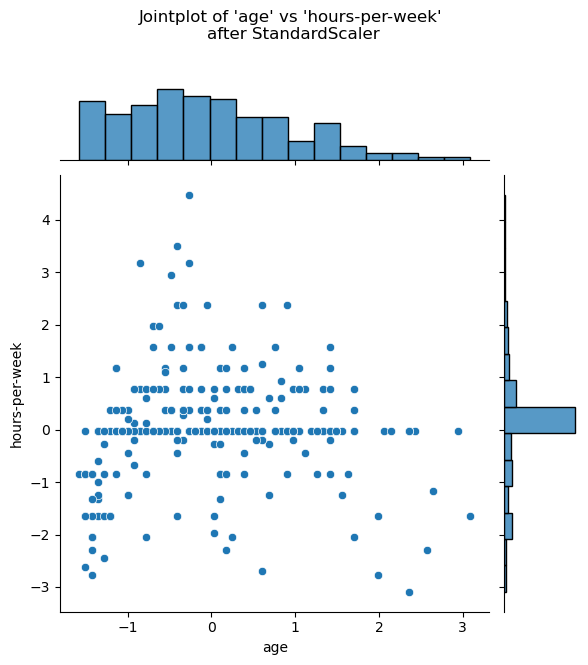

In [92]:
import matplotlib.pyplot  as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(data=data_train[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=data_train_scaled[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1)

In [93]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [94]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [95]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [96]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [100]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.807 with a fitting time of 0.112 seconds in 12 iterations


In [101]:
model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")

The accuracy using a LogisticRegression is 0.807 with a fitting time of 0.370 seconds in 59 iterations


## Model evaluation using Cross-Validation

In [102]:
import pandas as pd

adult_census = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census.csv")

In [103]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [104]:
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

In [106]:
%%time
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, target, cv=5)
cv_result

CPU times: user 1.07 s, sys: 49.4 ms, total: 1.11 s
Wall time: 1.78 s


{'fit_time': array([0.08985186, 0.3951261 , 0.55598783, 0.2953012 , 0.15212083]),
 'score_time': array([0.02513027, 0.03461909, 0.04816008, 0.03013706, 0.03385806]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80436118])}

In [107]:
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.800 ± 0.003


## Encoding categorical variables

In [108]:
adult_census = adult_census.drop(columns="education-num")

target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

In [109]:
data["native-country"].value_counts().sort_index()

 ?                               857
 Cambodia                         28
 Canada                          182
 China                           122
 Columbia                         85
 Cuba                            138
 Dominican-Republic              103
 Ecuador                          45
 El-Salvador                     155
 England                         127
 France                           38
 Germany                         206
 Greece                           49
 Guatemala                        88
 Haiti                            75
 Holand-Netherlands                1
 Honduras                         20
 Hong                             30
 Hungary                          19
 India                           151
 Iran                             59
 Ireland                          37
 Italy                           105
 Jamaica                         106
 Japan                            92
 Laos                             23
 Mexico                          951
 

In [110]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [111]:
data_categorical = data[categorical_columns]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [112]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 8 features


In [113]:
from sklearn.preprocessing import OrdinalEncoder

education_column = data_categorical[["education"]]

encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[ 1.],
       [11.],
       [ 7.],
       ...,
       [11.],
       [11.],
       [11.]])

In [114]:
encoder.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object)]

In [115]:
# encode all ccategorical columns
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[ 4.,  1.,  4.,  7.,  3.,  2.,  1., 39.],
       [ 4., 11.,  2.,  5.,  0.,  4.,  1., 39.],
       [ 2.,  7.,  2., 11.,  0.,  4.,  1., 39.],
       [ 4., 15.,  2.,  7.,  0.,  2.,  1., 39.],
       [ 0., 15.,  4.,  0.,  3.,  4.,  0., 39.]])

In [116]:
encoder.categories_

[array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried'

In [117]:
print(
    f"The dataset encoded contains {data_encoded.shape[1]} features")

The dataset encoded contains 8 features


In [125]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
education_encoded = encoder.fit_transform(education_column)
print(education_encoded.shape[1])
education_encoded

16


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
feature_names = encoder.get_feature_names_out(input_features=["education"])
education_encoded = pd.DataFrame(education_encoded, columns=feature_names)
education_encoded

,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [127]:
print(
    f"The dataset is composed of {data_categorical.shape[1]} features")
data_categorical.head()

The dataset is composed of 8 features


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [128]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [129]:
print(
    f"The encoded dataset contains {data_encoded.shape[1]} features")

The encoded dataset contains 102 features


In [130]:
columns_encoded = encoder.get_feature_names_out(data_categorical.columns)
pd.DataFrame(data_encoded, columns=columns_encoded).head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500)
)

In [132]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, data_categorical, target)
cv_results

{'fit_time': array([2.04810286, 0.68144608, 0.75368309, 0.77033186, 0.61803699]),
 'score_time': array([0.03209114, 0.03217697, 0.04465985, 0.08264613, 0.0286541 ]),
 'test_score': array([0.83222438, 0.83560242, 0.82872645, 0.83312858, 0.83466421])}

In [133]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The accuracy is: 0.833 ± 0.002


## Exercise M1.04

In [134]:
import pandas as pd

adult_census = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/adult-census.csv")

In [135]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name, "education-num"])

In [136]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]

In [145]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

model = make_pipeline(OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=514), LogisticRegression(max_iter=500))

In [148]:
from sklearn .model_selection import cross_validate
cv_results_model = cross_validate(model, data_categorical, target, cv=10, error_score="raise")

In [152]:
from sklearn.preprocessing import OneHotEncoder

model2 = make_pipeline(OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500))
cv_results_model2 = cross_validate(model2, data_categorical, target, cv=10, error_score="raise")

In [153]:
scores = cv_results_model["test_score"]
scores2 = cv_results_model2["test_score"]
print(f"The accuracy is: {scores.mean():.3f} ± {scores.std():.3f} and {scores2.mean():.3f} ± {scores2.std():.3f}")

The accuracy is: 0.755 ± 0.002 and 0.833 ± 0.003


In [154]:
# Baseline
from sklearn.dummy import DummyClassifier

cv_results = cross_validate(DummyClassifier(strategy="most_frequent"),
                            data_categorical, target)
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.761 ± 0.000


## Using numerical and categorical variables together

In [155]:
target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

In [156]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [160]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [162]:
from sklearn.model_selection import train_test_split

"""
Be aware that we use train_test_split here for didactic purposes, 
to show the scikit-learn API. In a real setting one might prefer to 
use cross-validation to also be able to evaluate the uncertainty of our 
estimation of the generalization performance of a model, as previously 
demonstrated.
"""

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [163]:
_ = model.fit(data_train, target_train)

In [164]:
data_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7762,56,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States
23881,25,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States
30507,43,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States
28911,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
19484,39,Private,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States


In [165]:
model.predict(data_test)[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)

In [170]:
target_test[:5]

/var/folders/km/f97xv6ws32x4nj4nm2kvfgjr0000gq/T/ipykernel_37765/3838488189.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  target_test[:5]


7762      <=50K
23881     <=50K
30507      >50K
28911     <=50K
19484     <=50K
Name: class, dtype: object

In [171]:
model.score(data_test, target_test)

0.8577512079272787

In [172]:
# Prediction with cross-validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([2.55704594, 1.80881691, 1.99001193, 1.50310397, 1.22496581]),
 'score_time': array([0.07869697, 0.08104706, 0.04394007, 0.05656195, 0.06312513]),
 'test_score': array([0.85116184, 0.8498311 , 0.84756347, 0.85268223, 0.85513923])}

In [173]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.851 ± 0.003


In [174]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [175]:
%%time
_ = model.fit(data_train, target_train)

CPU times: user 5.2 s, sys: 461 ms, total: 5.66 s
Wall time: 5.59 s


In [176]:
model.score(data_test, target_test)

0.8802718860044222

## Exercise M1.05

In [177]:
adult_census
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name, "education-num"])

In [178]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [179]:
# Reference pipeline (No numerical scaling and integer-coded categories)
import time

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_results = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} "
      f"with a fitting time of {elapsed_time:.3f}")

The mean cross-validation accuracy is: 0.873 ± 0.002 with a fitting time of 18.766


In [181]:
# Scaling numerical features

import time

from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OrdinalEncoder(handle_unknown="use_encoded_value",
                                   unknown_value=-1),
     categorical_columns)])

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_results = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} "
      f"with a fitting time of {elapsed_time:.3f}")

The mean cross-validation accuracy is: 0.873 ± 0.002 with a fitting time of 11.619


In [183]:
# One Hot Encoding of categorical variables
# solution
import time

from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(handle_unknown="ignore", sparse=False),
     categorical_columns)])

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_results = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} "
      f"with a fitting time of {elapsed_time:.3f}")

The mean cross-validation accuracy is: 0.834 ± 0.003 with a fitting time of 18.997


## Wrap-up quiz 1

In [184]:
import pandas as pd
ames_housing = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/ames_housing_no_missing.csv")

target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]
target = (target > 200_000).astype(int)

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [191]:
from sklearn.compose import make_column_selector as selector
categorical_data_selector = selector(dtype_include=object)
numerical_data_selector = selector(dtype_exclude=object)
numerical_columns = numerical_data_selector(data)
data[numerical_columns].shape[1]

36

In [195]:
example_columns = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt"]
data[example_columns]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt
0,65.0,8450,7,5,2003
1,80.0,9600,6,8,1976
2,68.0,11250,7,5,2001
3,60.0,9550,7,5,1915
4,84.0,14260,8,5,2000
...,...,...,...,...,...
1455,62.0,7917,6,5,1999
1456,85.0,13175,6,6,1978
1457,66.0,9042,7,9,1941
1458,68.0,9717,5,6,1950


In [198]:
numerical_features = [
  "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
  "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
  "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
  "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
  "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]
input_data = data[numerical_features]
model_exercise = make_pipeline(StandardScaler(), LogisticRegression())
cv_results_exercise = cross_validate(model_exercise, input_data, target, cv=10,)
cv_results_exercise

{'fit_time': array([0.31033397, 0.02580905, 0.02332711, 0.01978183, 0.03537989,
        0.02753377, 0.0252161 , 0.02019477, 0.02570701, 0.022717  ]),
 'score_time': array([0.00309587, 0.002002  , 0.00212789, 0.00363302, 0.00303006,
        0.0026722 , 0.00169277, 0.00195003, 0.00179982, 0.00268793]),
 'test_score': array([0.9109589 , 0.89041096, 0.9109589 , 0.88356164, 0.90410959,
        0.88356164, 0.88356164, 0.87671233, 0.89726027, 0.87671233])}

In [199]:
scores = cv_results_exercise["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} ")

The mean cross-validation accuracy is: 0.892 ± 0.013 


In [200]:
preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OrdinalEncoder(handle_unknown="ignore"),
     categorical_columns)])
model = make_pipeline(preprocessor, LogisticRegression())
cv_results_exercise = cross_validate(model_exercise, input_data, target, cv=2)
scores = cv_results_exercise["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} ")
cv_results_exercise = cross_validate(model_exercise, input_data, target, cv=5)
scores = cv_results_exercise["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} ")
cv_results_exercise = cross_validate(model_exercise, input_data, target, cv=9)
scores = cv_results_exercise["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f} ")

The mean cross-validation accuracy is: 0.889 ± 0.003 
The mean cross-validation accuracy is: 0.895 ± 0.011 
The mean cross-validation accuracy is: 0.891 ± 0.020 
